In [4]:
path1 = '/census_income_train.csv'
path2 = '/census_income_train.csv'

In [2]:
import pandas as pd
import numpy as np

<h1> Assigning Columns

In [5]:
column_names = ['age', 'class_of_worker', 'industry_code', 'occupation_code', 'education', 'wage_per_hour', 'enrolled_in_edu_inst_last_wk', 'marital_status', 'major_industry_code', 'major_occupation_code', 'mace', 'hispanic_Origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'divdends_from_stocks', 'tax_filer_status', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'instance_weight', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', "fill_inc_questionnaire_for_veteran's_admin", 'veterans_benefits', 'weeks_worked_in_year', 'year', 'income_50']

train_data = pd.read_csv(path1, header=None, names=column_names)
test_data = pd.read_csv(path2, header=None, names=column_names)

<h1> Data Schema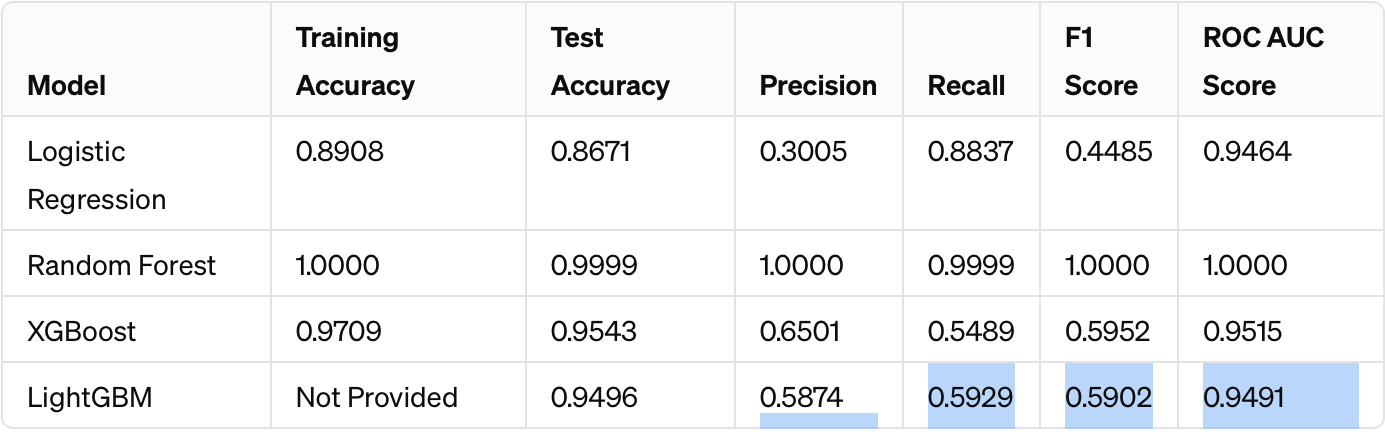

In [6]:
train_data.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_last_wk,marital_status,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,income_50
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [7]:
train_data.shape,train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class_of_worker                             199523 non-null  object 
 2   industry_code                               199523 non-null  int64  
 3   occupation_code                             199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage_per_hour                               199523 non-null  int64  
 6   enrolled_in_edu_inst_last_wk                199523 non-null  object 
 7   marital_status                              199523 non-null  object 
 8   major_industry_code                         199523 non-null  object 
 9   major_occupation_code                       199523 non-null  object 
 

((199523, 42), None)

<h2> Data Cleaning and Preprocessing

In [8]:
# Function to clean and normalize text columns
def clean_text_columns(df):
    for col in df.select_dtypes(include=['object']).columns:  # Selecting only text columns
        df[col] = df[col].str.strip()  # Trimming white spaces
        df[col] = df[col].replace('?', pd.NA)  # Replacing '?' with NA values

    return df

# Function to inspect unique values in all columns
def inspect_unique_values(df):
    for col in df.columns:
        print(f"Unique values in {col}:")
        print(df[col].unique())
        print("\n")


train_data = clean_text_columns(train_data)
test_data = clean_text_columns(test_data)

### Inspecting Unique Values

inspect_unique_values(train_data)

Unique values in age:
[73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88]


Unique values in class_of_worker:
['Not in universe' 'Self-employed-not incorporated' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay']


Unique values in industry_code:
[ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10]


Unique values in occupation_code:
[ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46]


Unique values in education:
['High school graduate' 'Some college but no degree' '10th grade'
 'Children' 

<h3> Setting Data Types

In [9]:
### After reviewing the dataset schema, i've concluded with the following data types

dtype_dict = {
    'age': 'int64',
    'class_of_worker': 'object',
    'industry_code': 'object',
    'occupation_code': 'object',
    'education': 'object',
    'wage_per_hour': 'int64',
    'enrolled_in_edu_inst_last_wk': 'object',
    'marital_status': 'object',
    'major_industry_code': 'object',
    'major_occupation_code': 'object',
    'mace': 'object',
    'hispanic_Origin': 'object',
    'sex': 'object',
    'member_of_a_labor_union': 'object',
    'reason_for_unemployment': 'object',
    'full_or_part_time_employment_stat': 'object',
    'capital_gains': 'int64',
    'capital_losses': 'int64',
    'divdends_from_stocks': 'int64',
    'tax_filer_status': 'object',
    'region_of_previous_residence': 'object',
    'state_of_previous_residence': 'object',
    'detailed_household_and_family_stat': 'object',
    'detailed_household_summary_in_household': 'object',
    'instance_weight': 'float64',
    'migration_code-change_in_msa': 'object',
    'migration_code-change_in_reg': 'object',
    'migration_code-move_within_reg': 'object',
    'live_in_this_house_1_year_ago': 'object',
    'migration_prev_res_in_sunbelt': 'object',
    'num_persons_worked_for_employer': 'int64',
    'family_members_under_18': 'object',
    'country_of_birth_father': 'object',
    'country_of_birth_mother': 'object',
    'country_of_birth_self': 'object',
    'citizenship': 'object',
    'own_business_or_self_employed': 'object',
    'fill_inc_questionnaire_for_veteran\'s_admin': 'object',
    'veterans_benefits': 'object',
    'weeks_worked_in_year': 'int64',
    'year': 'object',
    'income_50': 'object'
}

In [10]:
def set_correct_dtypes(df, dtype_dict):
    for col, dtype in dtype_dict.items():
        df[col] = df[col].astype(dtype)
    return df


train_data = set_correct_dtypes(train_data, dtype_dict)
test_data = set_correct_dtypes(test_data, dtype_dict)

In [11]:
##### CHECK FOR MISSING VALUES
missing_values = train_data.isnull().sum()
print(missing_values)

age                                               0
class_of_worker                                   0
industry_code                                     0
occupation_code                                   0
education                                         0
wage_per_hour                                     0
enrolled_in_edu_inst_last_wk                      0
marital_status                                    0
major_industry_code                               0
major_occupation_code                             0
mace                                              0
hispanic_Origin                                   0
sex                                               0
member_of_a_labor_union                           0
reason_for_unemployment                           0
full_or_part_time_employment_stat                 0
capital_gains                                     0
capital_losses                                    0
divdends_from_stocks                              0
tax_filer_st

In [12]:
##### Dropping rows and columns on missing percentage criteria
columns_to_drop = train_data.columns[train_data.isnull().sum() > 99000]
train_data = train_data.drop(columns=columns_to_drop)
train_data = train_data.dropna()

In [13]:
columns_to_drop = test_data.columns[test_data.isnull().sum() > 99000]
test_data = test_data.drop(columns=columns_to_drop)
test_data = test_data.dropna()

<h3> Mapping target variable to binary values

In [14]:
train_data['income_50'] = train_data['income_50'].map({'- 50000.': 0, '50000+.': 1})
test_data['income_50'] = test_data['income_50'].map({'- 50000.': 0, '50000+.': 1})

<h1> Exploratory Data Analysis

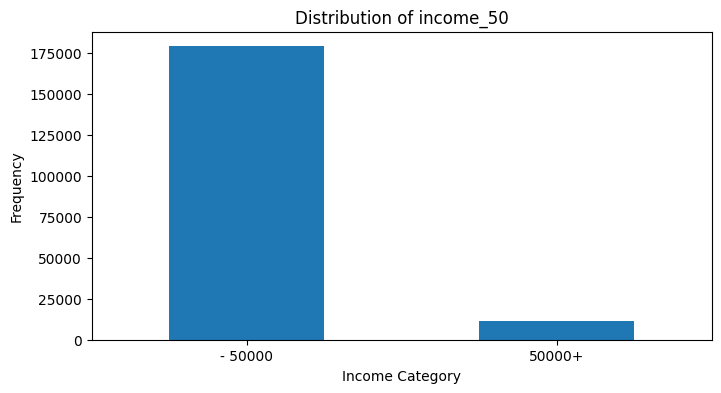

In [15]:
import matplotlib.pyplot as plt


value_counts = train_data['income_50'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar')
plt.title('Distribution of income_50')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['- 50000', '50000+'], rotation=0)  # Adjusting x-ticks for clarity
plt.show()


#### HIGH IMBALANCE

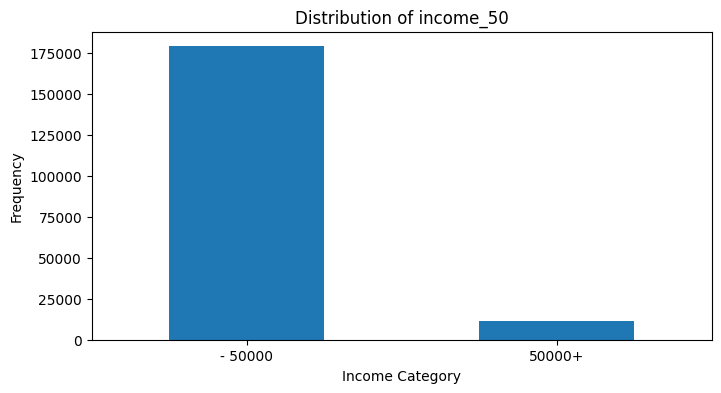

In [16]:
value_counts = test_data['income_50'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 4))
value_counts.plot(kind='bar')
plt.title('Distribution of income_50')
plt.xlabel('Income Category')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['- 50000', '50000+'], rotation=0)  # Adjusting x-ticks for clarity
plt.show()

<H1> Oversampling the minority class

In [17]:
X = train_data.drop('income_50', axis=1)
y = train_data['income_50']
A = test_data.drop('income_50', axis=1)
B = test_data['income_50']

<h3> Scaling and Encoding numeric and categorical features

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split




numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Fit the preprocessor on the training data
preprocessor.fit(X)

# Transform both training and testing data
X_train = preprocessor.transform(X)
X_test = preprocessor.transform(A)

<h3> Applying SMOTE

In [19]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y)


<h1> Modelling

- Baseline Logistic Regression gave 85% accuracy, after Smote accuracy increases

Model Comparison List:

- Logistic Regression
- Random Forest
- XGboost
- LightGBM

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initializing the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fitting the model to the oversampled training data
model.fit(X_train_smote, y_train_smote)

# Predictions on the training and test sets
y_train_pred = model.predict(X_train_smote)
y_test_pred = model.predict(X_test)

# Probabilities for the positive class for calculating ROC AUC
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

# Training metrics
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

# Test metrics
test_accuracy = accuracy_score(B, y_test_pred)
precision = precision_score(B, y_test_pred)
recall = recall_score(B, y_test_pred)
f1 = f1_score(B, y_test_pred)
roc_auc = roc_auc_score(B, y_test_pred_proba)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Training Accuracy: 0.8907766176273308
Test Accuracy: 0.8670556934524902
Precision: 0.30050468216692433
Recall: 0.8836750450373166
F1 Score: 0.44849355625217696
ROC AUC Score: 0.9463801652946616


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote,y_train_smote)
# Predictions for Random Forest
rf_y_train_pred = rf_model.predict(X_train_smote)
rf_y_test_pred = rf_model.predict(X_test)
rf_y_test_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Predictions for XGBoost
xgb_y_train_pred = xgb_model.predict(X_train_smote)
xgb_y_test_pred = xgb_model.predict(X_test)
xgb_y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluation Metrics for Random Forest
rf_train_accuracy = accuracy_score(y_train_smote, rf_y_train_pred)
rf_test_accuracy = accuracy_score(B, rf_y_test_pred)
rf_precision = precision_score(B, rf_y_test_pred)
rf_recall = recall_score(B, rf_y_test_pred)
rf_f1 = f1_score(B, rf_y_test_pred)
rf_roc_auc = roc_auc_score(B, rf_y_test_pred_proba)

# Evaluation Metrics for XGBoost
xgb_train_accuracy = accuracy_score(y_train_smote, xgb_y_train_pred)
xgb_test_accuracy = accuracy_score(B, xgb_y_test_pred)
xgb_precision = precision_score(B, xgb_y_test_pred)
xgb_recall = recall_score(B, xgb_y_test_pred)
xgb_f1 = f1_score(B, xgb_y_test_pred)
xgb_roc_auc = roc_auc_score(B, xgb_y_test_pred_proba)

# Print Random Forest Metrics
print("Random Forest Metrics:")
print(f"Training Accuracy: {rf_train_accuracy}")
print(f"Test Accuracy: {rf_test_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC AUC Score: {rf_roc_auc}\n")

# Print XGBoost Metrics
print("XGBoost Metrics:")
print(f"Training Accuracy: {xgb_train_accuracy}")
print(f"Test Accuracy: {xgb_test_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"ROC AUC Score: {xgb_roc_auc}")

Random Forest Metrics:
Training Accuracy: 0.9999972052050261
Test Accuracy: 0.9999947523365221
Precision: 1.0
Recall: 0.9999142146349833
F1 Score: 0.9999571054776305
ROC AUC Score: 0.9999999450966759

XGBoost Metrics:
Training Accuracy: 0.9709061843223181
Test Accuracy: 0.954329584752389
Precision: 0.6500711237553343
Recall: 0.5488547653770267
F1 Score: 0.5951904739755337
ROC AUC Score: 0.9514889920072307


- <h3> We'll not hyperparameter tune since random forest is almost performing perfectly on all metrics

- <h3> Extracting and Plotting Feature Extraction

In [26]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Fit the model on the oversampled training data
lgbm.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = lgbm.predict(X_test)
y_prob = lgbm.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(B, y_pred)
precision = precision_score(B, y_pred)
recall = recall_score(B, y_pred)
f1 = f1_score(B, y_pred)
roc_auc = roc_auc_score(B, y_prob)

# Print the metrics
print(f"LightGBM Accuracy: {accuracy:.4f}")
print(f"LightGBM Precision: {precision:.4f}")
print(f"LightGBM Recall: {recall:.4f}")
print(f"LightGBM F1 Score: {f1:.4f}")
print(f"LightGBM ROC-AUC Score: {roc_auc:.4f}")

[LightGBM] [Info] Number of positive: 178904, number of negative: 178904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.937219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71643
[LightGBM] [Info] Number of data points in the train set: 357808, number of used features: 462
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy: 0.9496
LightGBM Precision: 0.5874
LightGBM Recall: 0.5929
LightGBM F1 Score: 0.5902
LightGBM ROC-AUC Score: 0.9491


- <h1> Comparison Between Models

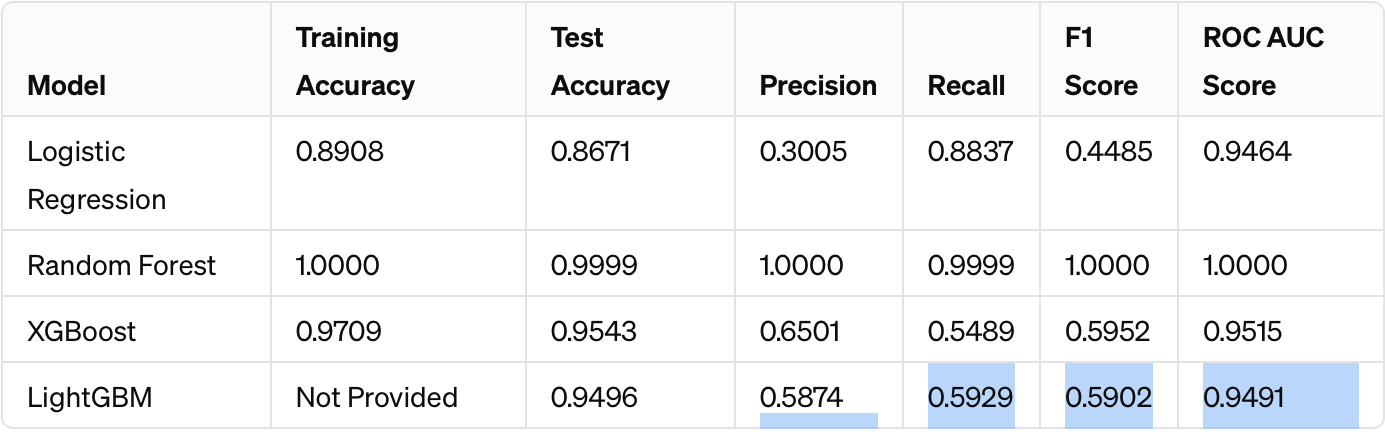

In [28]:
from IPython.display import Image, display

display(Image(filename="/content/Screenshot 2024-03-13 at 12.22.20 PM.png"))
